### Add Fast AI path to environment

In [1]:
import os
import sys
sys.path.append(os.environ.get("FASTAI_PATH"))

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
data_path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
data = (
    ImageList.from_folder(data_path) # images path
    .split_by_folder() # split train and valid datasets by folder
    .label_from_folder()  # get labels from folder name
    .transform(size=28) # resize each image to 28x28
    .databunch(bs=128) # batch size 128
    .normalize(imagenet_stats) # normalize images with mean and std from IMageNet
)

### Create Learner
- use error rate as monitoring metric.
- use 2 BN-dropout-linear-relu blocks

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, lin_ftrs=[128,128])

In [6]:
learn.model[1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25)
  (4): Linear(in_features=1024, out_features=128, bias=True)
  (5): ReLU(inplace)
  (6): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.25)
  (8): Linear(in_features=128, out_features=128, bias=True)
  (9): ReLU(inplace)
  (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Dropout(p=0.5)
  (12): Linear(in_features=128, out_features=2, bias=True)
)

### Find lr

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-02
Min loss divided by 10: 4.37E-02


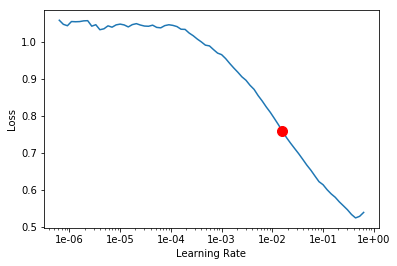

In [8]:
learn.recorder.plot(suggestion=True)

### Train Model

In [9]:
learn.fit_one_cycle(3, 5E-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.074324,0.044799,0.015702,00:05
1,0.038547,0.006909,0.001963,00:05
2,0.016015,0.005908,0.001963,00:05


In [10]:
learn.unfreeze()
best_model = "mnist_sample_resnet34"
# learn.fit_one_cycle(10, slice(1E-6, 1E-3), callbacks=[SaveModelCallback(learn, name=best_model)])
learn.fit_one_cycle(10, slice(1E-6, 1E-3), callbacks=[SaveModelCallback(learn, name=best_model, monitor="error_rate", mode="min")])

epoch,train_loss,valid_loss,error_rate,time
0,0.008423,0.006360,0.001963,00:06
1,0.011608,0.005553,0.001472,00:06
2,0.006315,0.008596,0.001963,00:06
3,0.006414,0.007582,0.001963,00:06
4,0.003240,0.004480,0.000491,00:06
5,0.002064,0.008907,0.001963,00:06
6,0.001787,0.007834,0.001963,00:06
7,0.000506,0.006066,0.000981,00:06
8,0.000333,0.005457,0.000981,00:06
9,0.000222,0.005523,0.000981,00:06


Better model found at epoch 0 with error_rate value: 0.001962709240615368.
Better model found at epoch 1 with error_rate value: 0.0014720313483849168.
Better model found at epoch 4 with error_rate value: 0.0004906771355308592.


### Evaluate Model Performance

In [11]:
interp = learn.interpret()

Using SaveModelCallback, fastai will load the best model automatically. **Sometimes this is an annoying feature**

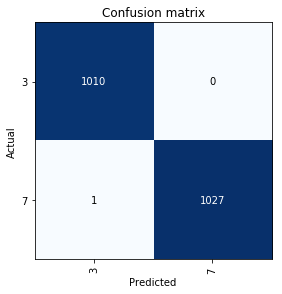

In [12]:
interp.plot_confusion_matrix()